In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import joblib
import numpy as np

d:\Kaggle\Kaggle-HCT-Survival-Predictions\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [97]:
file_path=Path('../data/raw')
train=pd.read_csv(os.path.join(file_path,'train.csv'),index_col='ID')
test=pd.read_csv(os.path.join(file_path,'test.csv'))
sample=pd.read_csv(os.path.join(file_path,'sample_submission.csv'))
data=pd.read_csv(os.path.join(file_path,'data_dictionary.csv'))

In [86]:
numerical_col=['donor_age','age_at_hct']
target_col=['year_hct','efs_time','efs','race_group']
categorical_col=train.drop(numerical_col+target_col,axis=1).columns

# 1. Feature encoding

In [87]:
encoding=OneHotEncoder()

In [88]:
# encoding.fit_transform(train[categorical_col]).toarray()
# encoding.get_feature_names_out() # check feature name
df_cat=pd.DataFrame(encoding.fit_transform(train[categorical_col]).toarray(),columns=encoding.get_feature_names_out())

In [89]:
df_cat.head(3)

,dri_score_High,dri_score_High - TED AML case <missing cytogenetics,dri_score_Intermediate,dri_score_Intermediate - TED AML case <missing cytogenetics,dri_score_Low,dri_score_Missing disease status,dri_score_N/A - disease not classifiable,dri_score_N/A - non-malignant indication,dri_score_N/A - pediatric,dri_score_TBD cytogenetics,...,pulm_moderate_Yes,pulm_moderate_nan,hla_low_res_10_4.0,hla_low_res_10_5.0,hla_low_res_10_6.0,hla_low_res_10_7.0,hla_low_res_10_8.0,hla_low_res_10_9.0,hla_low_res_10_10.0,hla_low_res_10_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# 2. Feature scaling

In [91]:
ss=StandardScaler()

In [92]:
df_num=pd.DataFrame(ss.fit_transform(train[numerical_col]),columns=ss.get_feature_names_out())

In [93]:
joblib.dump(encoding,'../feature_store/one_hot_encoder.pkl')
joblib.dump(ss,'../feature_store/standard_scaler.pkl')
joblib.dump(categorical_col,'../feature_store/categorical_col.pkl')
joblib.dump(numerical_col,'../feature_store/numerical_col.pkl')
joblib.dump(target_col,'../feature_store/target_col.pkl')

['../feature_store/target_col.pkl']

# 3. Dimensonality reduction

### 1. PCA

In [118]:
pca=PCA(n_components=2,random_state=42)

In [119]:
df_pca=pd.DataFrame(pca.fit_transform(df_cat),columns=[f'pca_{i}' for i in range(2)])

<Axes: xlabel='pca_0', ylabel='pca_1'>

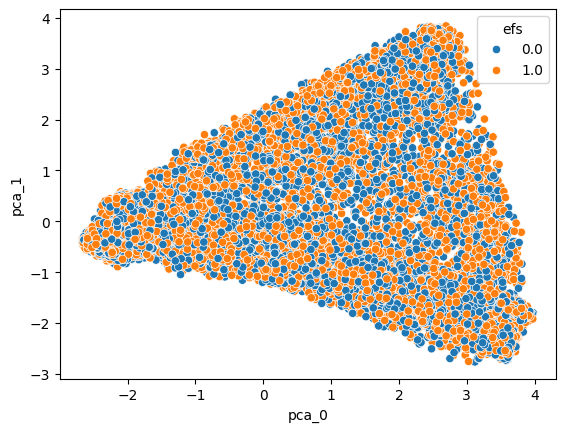

In [121]:
sns.scatterplot(x='pca_0',y='pca_1',data=df_pca,hue=train.efs)

### 2. TSNE

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

In [114]:
df_tsne=pd.DataFrame(tsne.fit_transform(df_cat),columns=[f'tsne_{i}' for i in range(2)])

<Axes: xlabel='tsne_0', ylabel='tsne_1'>

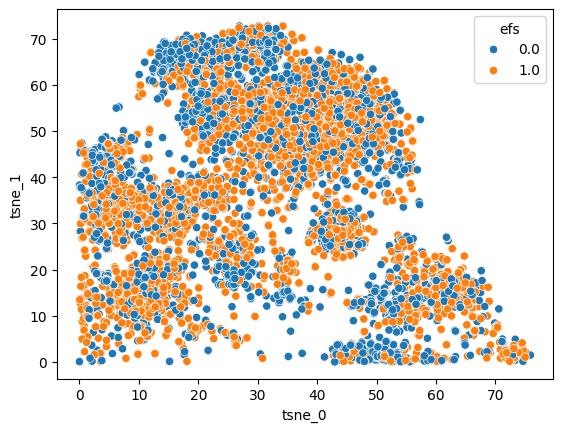

In [124]:
df_tsne_=df_tsne[(df_tsne.tsne_0>0)&(df_tsne.tsne_1>0)]
sns.scatterplot(x='tsne_0',y='tsne_1',data=df_tsne_,hue=train.loc[df_tsne_.index].efs)

### 3. UMAP

In [126]:
umap_reducer=umap.UMAP(n_components=2)

In [129]:
df_umap=pd.DataFrame(umap_reducer.fit_transform(df_cat),columns=[f'umap_{i}' for i in range(2)])

<Axes: xlabel='umap_0', ylabel='umap_1'>

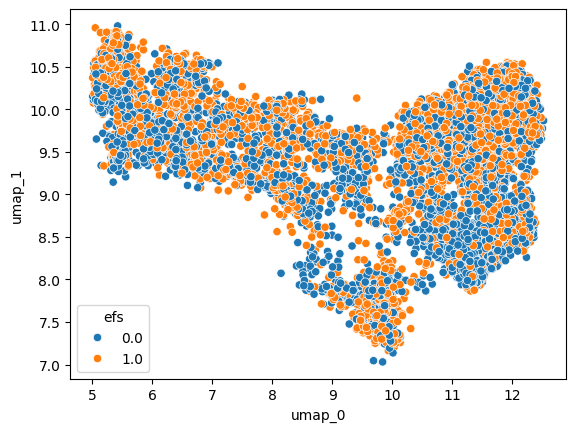

In [132]:
df_umap_=df_umap[(df_umap.umap_0>5)&(df_umap.umap_1>7)]
sns.scatterplot(x='umap_0',y='umap_1',data=df_umap,hue=train.loc[df_umap_.index].efs)

In [134]:
joblib.dump(pca,'../feature_store/pca.pkl')
joblib.dump(tsne,'../feature_store/tsne.pkl')
joblib.dump(umap_reducer,'../feature_store/umap_encoder.pkl')

['../feature_store/umap_encoder.pkl']

<Axes: >

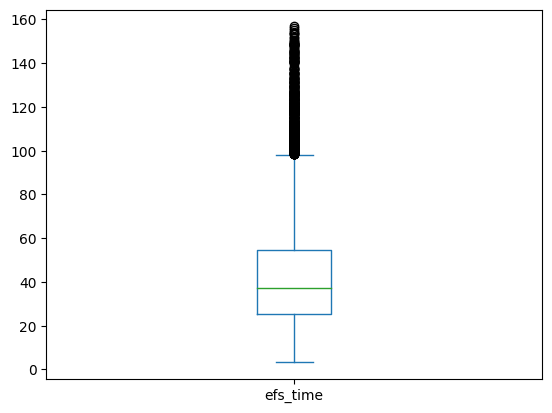

In [10]:
train[train.efs==0].efs_time.plot(kind='box')

<Axes: >

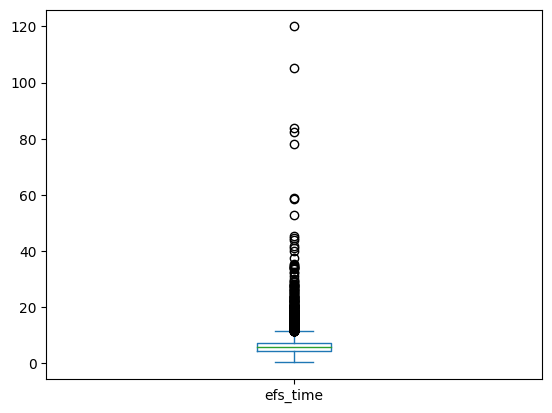

In [11]:
train[train.efs==1].efs_time.plot(kind='box')

In [13]:
train[train.efs==1].efs_time.describe()

count    15532.000000
mean         6.252439
std          3.386629
min          0.333000
25%          4.477000
50%          5.803000
75%          7.322000
max        120.009000
Name: efs_time, dtype: float64

In [14]:
train[train.efs==0].efs_time.describe()

count    13268.000000
mean        43.121212
std         24.258854
min          3.212000
25%         25.273500
50%         37.194000
75%         54.452500
max        156.819000
Name: efs_time, dtype: float64